In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/digipodium/Datasets/main/bike_rental.csv",
                  parse_dates=['dteday'],dayfirst=True)

In [3]:
df.head(2)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40


In [4]:
df.holiday.value_counts()

0    16879
1      500
Name: holiday, dtype: int64

<AxesSubplot:xlabel='dteday'>

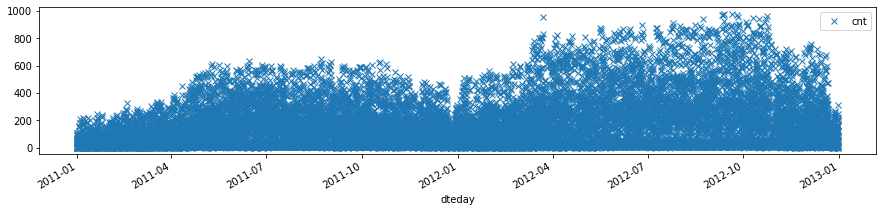

In [5]:
df.plot(x='dteday',y='cnt',style='x',figsize=(15,3))

<AxesSubplot:>

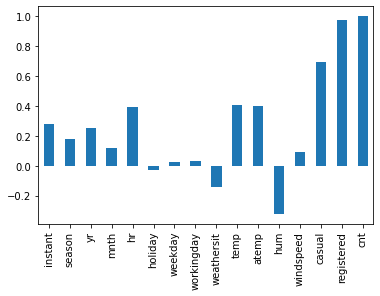

In [6]:
df.corrwith(df['cnt']).plot(kind='bar')

In [7]:
X = df[['hr','temp','atemp','hum']]
y = df['cnt']

In [8]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [9]:
xtrain, xtest, ytrain, ytest =  train_test_split(X,y,test_size=.2,random_state=42)

In [10]:
reg = DecisionTreeRegressor(max_depth=50)
reg.fit(xtrain, ytrain)

DecisionTreeRegressor(max_depth=50)

In [11]:
ypred = reg.predict(xtest)

In [12]:
print("score",reg.score(xtest,ytest)*100)
print("mae",mean_absolute_error(ytest,ypred))
print("mse",mean_squared_error(ytest,ypred))
# print('all data score',reg.score(X,y) * 100)

score 43.4573466170013
mae 85.63617036093302
mse 17904.4637742735


In [13]:
df['pred'] = reg.predict(X)

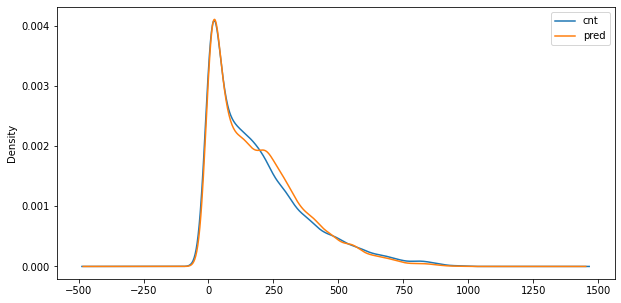

In [14]:
df['cnt'].plot(kind='kde',figsize=(10,5))
df['pred'].plot(kind='kde',figsize=(10,5))
plt.legend()
plt.show()

In [15]:
from sklearn.tree import plot_tree

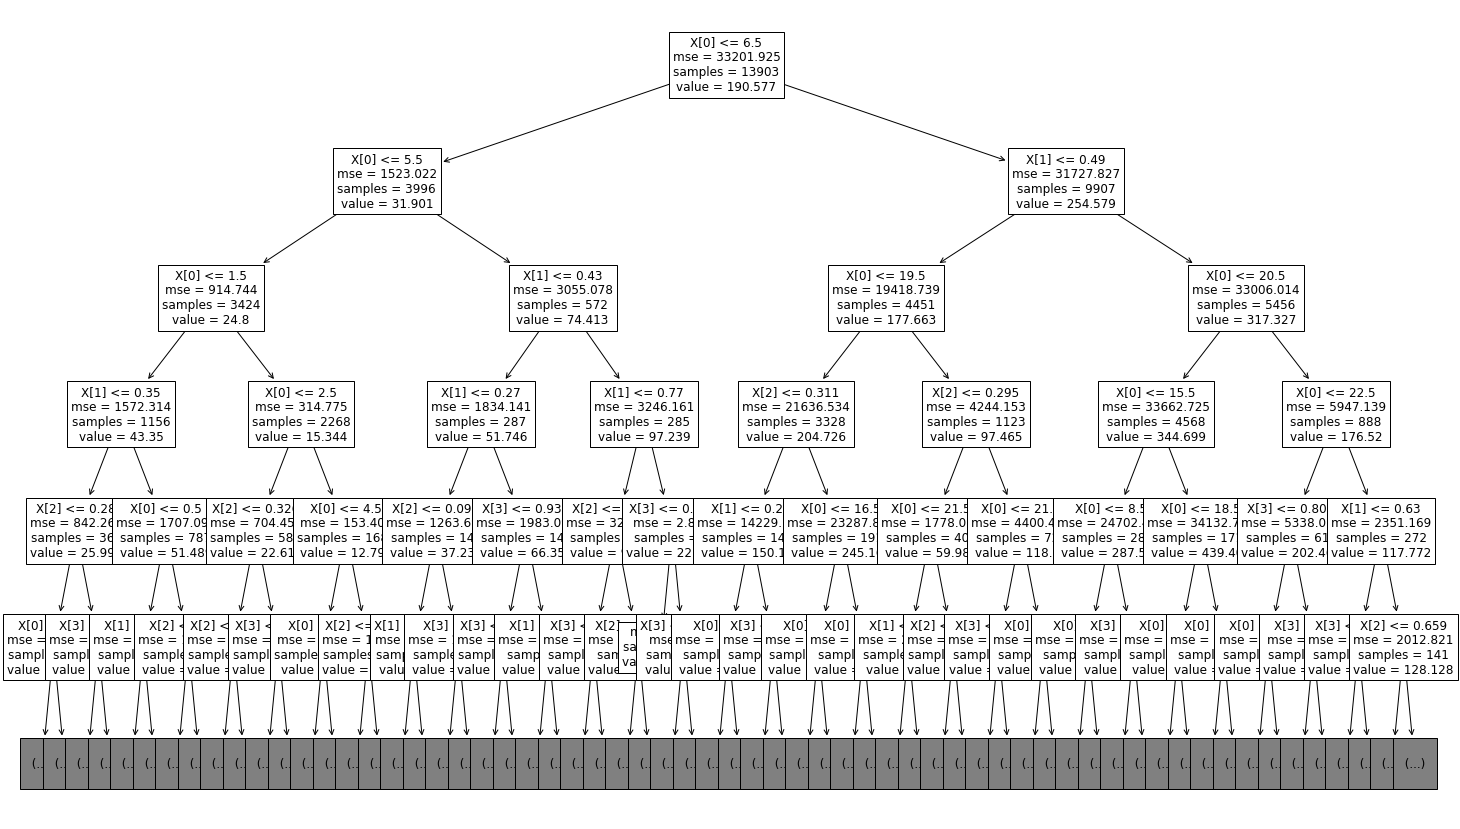

In [19]:
plt.figure(figsize=(25,15))
plot_tree(reg, max_depth=5,fontsize=12)
plt.show()